Kerrian LE CAILLEC - Thomas MIGLIASSO

## TP Question I

On travaille dans le cadre du modèle de Black & Scholes. Dans toutes ces questions, on
considère un call européen de maturité $T$ et de strike $K$. On pourra prendre comme valeurs de référence $S_0 = 100, K = 100, T = 1, r = 0.05, \sigma = 0.20$.


1. Pour différentes valeurs de $T$, tracer sur un même graphe en fonction de $S_0$ le prix du call
européen de maturité $T$ obtenu par la formule de Black & Scholes. Commenter. Même question pour le $\Delta$ et le $\Gamma$ du call.

In [88]:
import numpy as np
from scipy.stats import norm, skew, kurtosis
import matplotlib.pyplot as plt

In [75]:
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

In [ ]:
def call_price_black_scholes(K, T, S0, r, sigma):
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


def delta_call_bs(K, T, S0, r, sigma):
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    return norm.cdf(d1)


def gamma_call_bs(K, T, S0, r, sigma):
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    return norm.pdf(d1) / (S0 * sigma * np.sqrt(T))

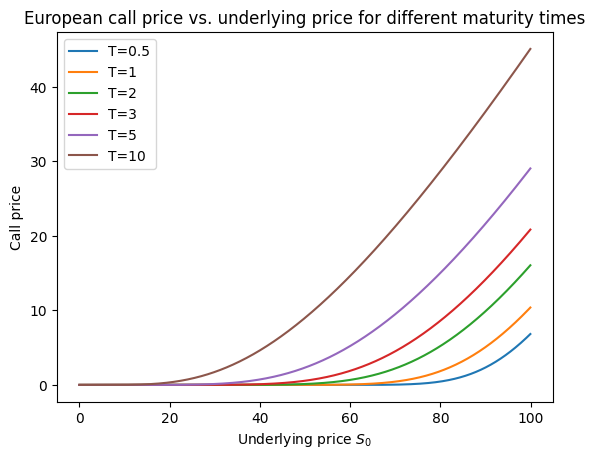

In [5]:
S = np.arange(0.01, 100, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10]:
    price = [call_price_black_scholes(K, Ti, s, r, sigma) for s in S]
    plt.plot(S, price, label=f"T={Ti}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("Call price")
plt.title("European call price vs. underlying price for different maturity times")
plt.legend()
plt.show()

Plus l'horizon d'un call est grand, plus le prix de l'option est élevé et ceci même si le strike price est out-the-money, pour un temps de maturité de 10 ans par exemple, pour $S_0=40$ et $K=100$, le prix de l'option est non nul. Ceci peut s'expliquer par la variance toujours croissante du mouvement Brownien dans les hypothèses du modèle de Black-Scholes en fonction du temps.

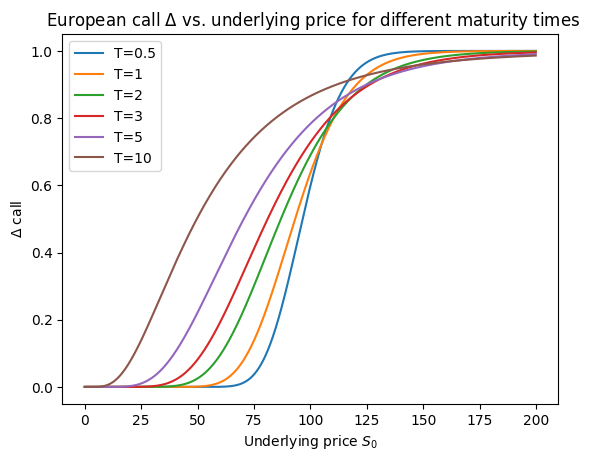

In [6]:
S = np.arange(0.01, 200, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10]:
    price = [delta_call_bs(K, Ti, s, r, sigma) for s in S]
    plt.plot(S, price, label=f"T={Ti}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("$\Delta$ call")
plt.title(" European call $\Delta$ vs. underlying price for different maturity times")
plt.legend()
plt.show()

On remarque que $\Delta$ tend vers 0 lorsque $S_0\rightarrow 0$ et $\Delta$ tend vers 1 lorsque $S_0\rightarrow +\infty$ et $\Delta$ est croissante selon $S_0$. On a affaire à une fonction de répartition en $S_0$. Plus le temps à maturité est faible, plus les variations de $\Delta$ sont lentes. (Sur le graphe ci-dessous on retrouve cette idée avec le fait que $\|\Gamma\|_\infty$ est plus faible pour $T$ grand)

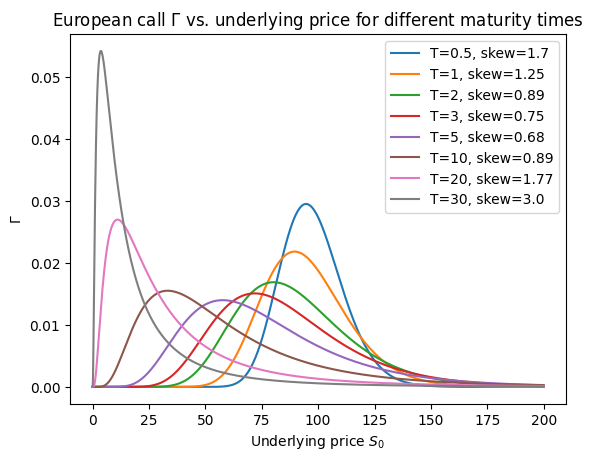

In [91]:
S = np.arange(0.01, 200, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10, 20, 30]:
    price = [gamma_call_bs(K, Ti, s, r, sigma) for s in S]

    plt.plot(S, price, label=f"T={Ti}, skew={round(skew(price), 2)}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("$\Gamma$")
plt.title("European call $\Gamma$ vs. underlying price for different maturity times")
plt.legend()
plt.show()

- Les densités sont de plus en plus asymétriques lorsque $T$ est grand. 
- Les modes des densités tendent vers 0, pluts $T$ est grand.

2. Tracer en fonction de N (nombre de simulations) le prix Monte Carlo et l’intervalle de confiance associé (échelle logarithmique sur l'axe des abscisses). Commenter. A partir de
quel N obtient-on une erreur relative du prix Monte Carlo inférieure à 0.1% ?


In [ ]:
def monte_carlo_price(x, K, T, S0, r, sigma):
    price_at_T = S0 * np.exp((r - sigma**2 / 2) * T + sigma * x * np.sqrt(T)) - K
    return np.exp(-r * T) * np.maximum(0, price_at_T)


def bessel_standard_error(Xs, N):
    return np.sqrt(np.var(Xs, ddof=1) / N)


def monte_carlo_estimator(N, K, T, S0, r, sigma, alpha=0.05):
    samples = norm.rvs(size=N)
    phis = monte_carlo_price(samples, K, T, S0, r, sigma)

    Cn = np.mean(phis)

    return Cn, Cn + np.array(norm.interval(1 - alpha)) * bessel_standard_error(phis, N)

A N=7934096.665797492, l'erreur relative est de <0.1%


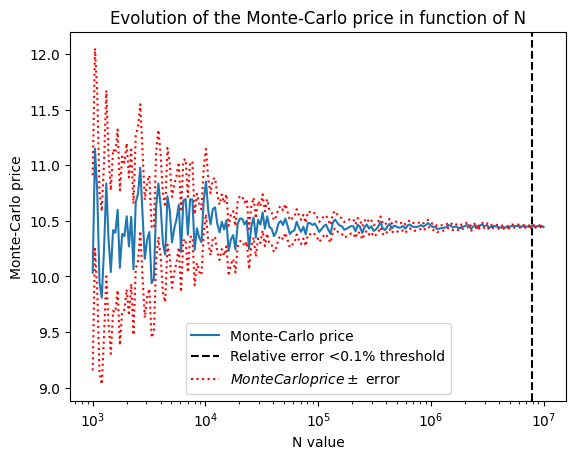

In [ ]:
Cns, Cns_up, Cns_down = [], [], []
N_range = np.logspace(3, 7, 200)
for Ni in N_range:
    Cn, error_Cn = monte_carlo_estimator(int(Ni), K, T, S0, r, sigma)
    Cns.append(Cn)
    Cns_up.append(error_Cn[1])
    Cns_down.append(error_Cn[0])
error = (np.array(Cns_up) - np.array(Cns_down)) / (2 * np.array(Cns))
min_thresh = np.argmax(error < 1e-3)

plt.plot(N_range, Cns, label="Monte-Carlo price")
plt.axvline(N_range[min_thresh], linestyle="--", color="black", label="Relative error <0.1% threshold")
print(f"A N={N_range[min_thresh]}, l'erreur relative est de <0.1%")
plt.plot(N_range, Cns_up, linestyle=":", color="red", label="Monte Carlo price $\pm$ error")
plt.plot(N_range, Cns_down, linestyle=":", color="red")
plt.xscale("log")
plt.xlabel("N value")
plt.ylabel("Monte-Carlo price")
plt.title("Evolution of the Monte-Carlo price in function of N")
plt.legend()
plt.show()

Le prix oscille énormément avec une erreur grande pour des valeurs de $N$ petites (environ $\pm 1$ d'erreur absolue pour $N=10^3$). Néanmoins, au-delà de $N=10^6$ la courbe semble se stabiliser. Mais il faut tout de même $N\geq5e6$ pour qu'on soit sous la barre de 0.1% d'erreur relative.

3. Pour un $N$ fixé, simuler 100 prix de Monte Carlo et calculer l’écart-type $\hat\sigma_N$ de ces prix.
Faites varier $N$ et tracer $\hat\sigma_N$ en fonction de $N$ en échelle logarithmique. Commenter

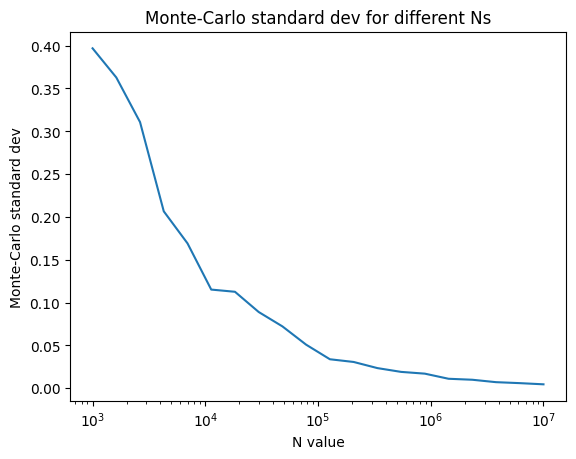

In [92]:
N_range = np.logspace(3, 7, 20)
stds = [np.std(np.array([monte_carlo_estimator(int(Ni), K, T, S0, r, sigma)[0] for _ in range(100)])) for Ni in N_range]
plt.plot(N_range, stds)
plt.xscale("log")
plt.xlabel("N value")
plt.ylabel("Monte-Carlo standard dev")
plt.title("Monte-Carlo standard dev for different Ns")
plt.show()

L'écart type diminue assez faiblement en fonction de $N$. Il faut $N> 10^5$ pour que l'écart type soit inférieur à 0.05.

4. Pour un N fixé, simuler 1 000 prix de Monte Carlo. Tracer leur densité empirique et répéter pour différentes valeurs de N. Commenter

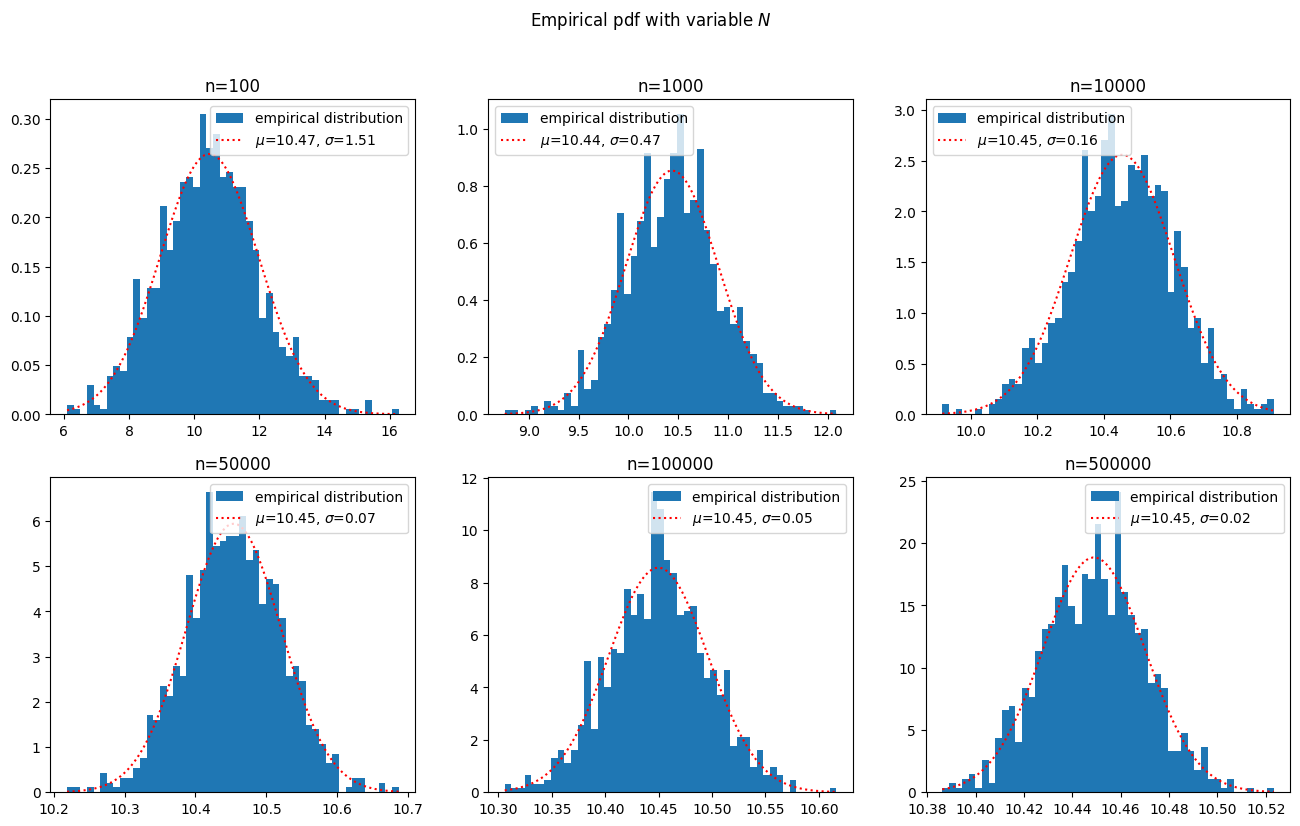

In [96]:
_, axs = plt.subplots(2, 3, figsize=(16, 9))
N_values = [100, 1000, 10000, 50000, 100000, 500000]
for i, Ni in enumerate(N_values):
    mc_prices = [
        monte_carlo_estimator(int(Ni), K, T, S0, r, sigma)[0] for _ in range(1000)
    ]
    mu_f, sigma_f = norm.fit(mc_prices)
    axs[i // 3, i % 3].hist(
        mc_prices, bins=50, density=True, label="empirical distribution"
    )
    axs[i // 3, i % 3].plot(
        np.linspace(min(mc_prices), max(mc_prices), 100),
        norm.pdf(
            np.linspace(min(mc_prices), max(mc_prices), 100), loc=mu_f, scale=sigma_f
        ),
        label=f"$\mu$={round(mu_f, 2)}, $\sigma$={round(sigma_f, 2)}",
        linestyle=":",
        color="red",
    )
    axs[i // 3, i % 3].set_title(f"n={Ni}")
    axs[i // 3, i % 3].legend()
plt.suptitle("Empirical pdf with variable $N$")
plt.show()

Le support de la distribution est de largeur toujours plus faible à mesure que $N\rightarrow \infty$, ceci est attendu car l'estimateur converge vers la valeur moyenne d'après la loi des grands nombres. De plus, la distribution des prix apparait comme normale. Ceci est attendu en conséquence du théorème central limite.

5. En utilisant $\texttt{\%\%timeit}$ en début de cellule, mesurer le temps de calcul moyen d’un prix Monte Carlo à $N = 10^6$ simulations avec votre code.


In [84]:
%timeit monte_carlo_estimator(10**6, K, T, S0, r, sigma)

92.3 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


La rapidité de la méthode n'est pas son point fort.